# Import Necessary Libreries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import silhouette_score
## Hyperopt modules
#from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
#from functools import partial
from sklearn.metrics import roc_auc_score
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# Setting seabon style
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox, probplot, norm
from scipy.special import inv_boxcox
import pickle
import re
import datetime as dt


# Import Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Flight_Fare_price_Predictions/Data_Train1.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Understanding

In [4]:
df.shape

(10683, 11)

In [5]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

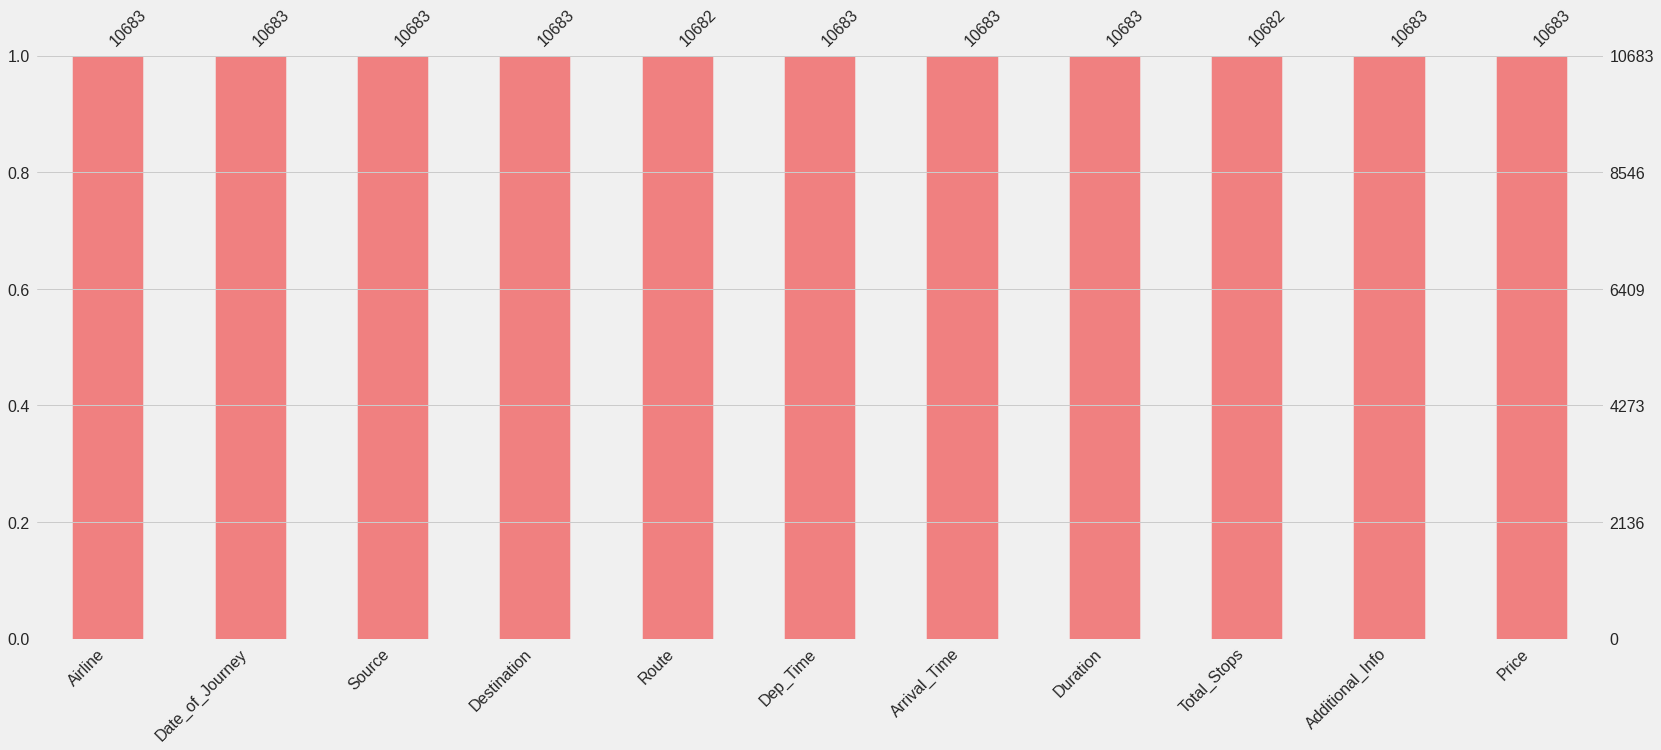

In [6]:
import missingno as msn
msn.bar(df=df,color='lightcoral')

In [7]:
df=df.dropna()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10682,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10682,40,18-05-2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10682,5,Delhi,4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10682,6,Cochin,4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL ? BOM ? COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10682,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10682,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10682,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10682,10,No info,8344,NaN,NaN,NaN,NaN,NaN,NaN,NaN


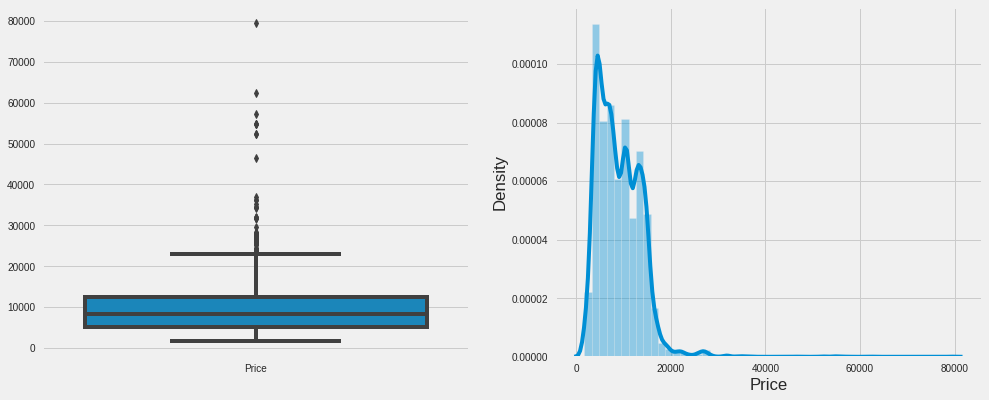

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=df)
plt.subplot(1,2,2)
sns.distplot(df["Price"])
plt.show()

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [14]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
df["Route"].value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [16]:
df["Route"].unique()

array(['BLR ? DEL', 'CCU ? IXR ? BBI ? BLR', 'DEL ? LKO ? BOM ? COK',
       'CCU ? NAG ? BLR', 'BLR ? NAG ? DEL', 'CCU ? BLR',
       'BLR ? BOM ? DEL', 'DEL ? BOM ? COK', 'DEL ? BLR ? COK',
       'MAA ? CCU', 'CCU ? BOM ? BLR', 'DEL ? AMD ? BOM ? COK',
       'DEL ? PNQ ? COK', 'DEL ? CCU ? BOM ? COK', 'BLR ? COK ? DEL',
       'DEL ? IDR ? BOM ? COK', 'DEL ? LKO ? COK',
       'CCU ? GAU ? DEL ? BLR', 'DEL ? NAG ? BOM ? COK',
       'CCU ? MAA ? BLR', 'DEL ? HYD ? COK', 'CCU ? HYD ? BLR',
       'DEL ? COK', 'CCU ? DEL ? BLR', 'BLR ? BOM ? AMD ? DEL',
       'BOM ? DEL ? HYD', 'DEL ? MAA ? COK', 'BOM ? HYD',
       'DEL ? BHO ? BOM ? COK', 'DEL ? JAI ? BOM ? COK',
       'DEL ? ATQ ? BOM ? COK', 'DEL ? JDH ? BOM ? COK',
       'CCU ? BBI ? BOM ? BLR', 'BLR ? MAA ? DEL',
       'DEL ? GOI ? BOM ? COK', 'DEL ? BDQ ? BOM ? COK',
       'CCU ? JAI ? BOM ? BLR', 'CCU ? BBI ? BLR', 'BLR ? HYD ? DEL',
       'DEL ? TRV ? COK', 'CCU ? IXR ? DEL ? BLR',
       'DEL ? IXU ? BOM ? COK', 'CCU 

In [17]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [18]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

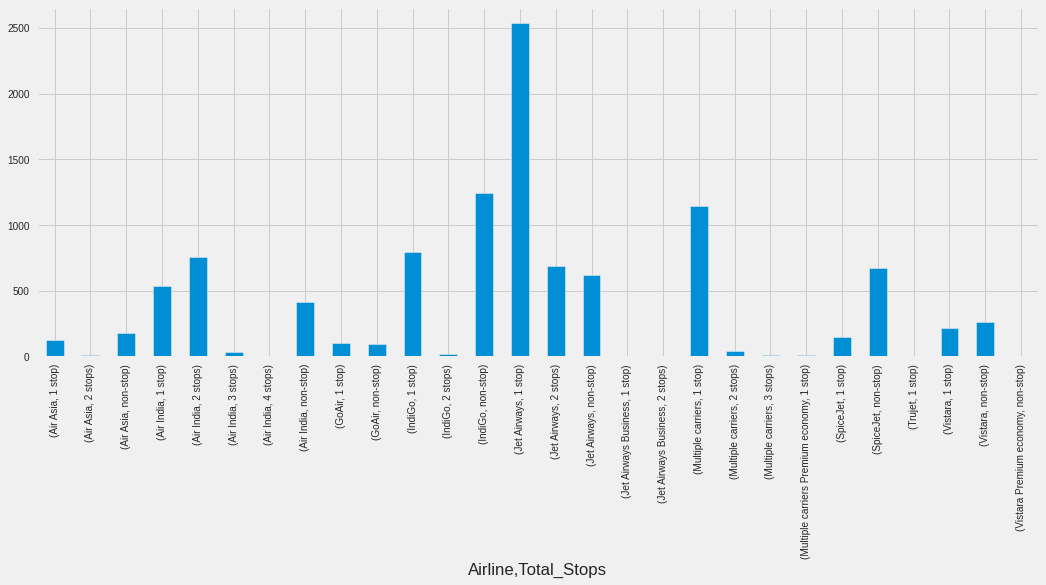

In [19]:
df.groupby(by=["Airline","Total_Stops"])["Price"].count().plot(kind='bar',figsize=(16,6))

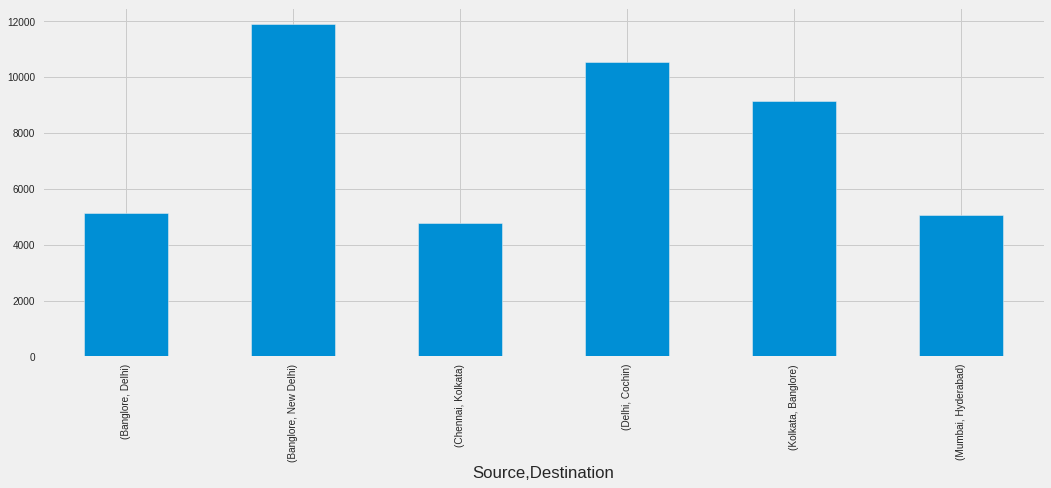

In [20]:
df.groupby(by=["Source","Destination"])["Price"].mean().plot(kind='bar',figsize=(16,6))

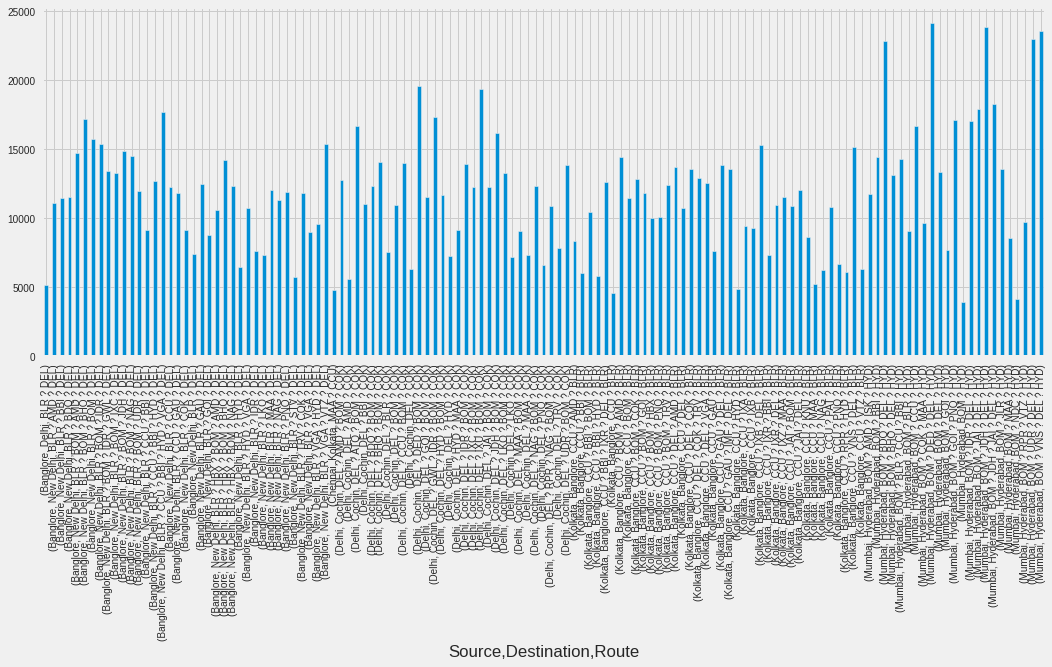

In [21]:
df.groupby(by=["Source","Destination","Route"])["Price"].mean().plot(kind='bar',figsize=(16,6))

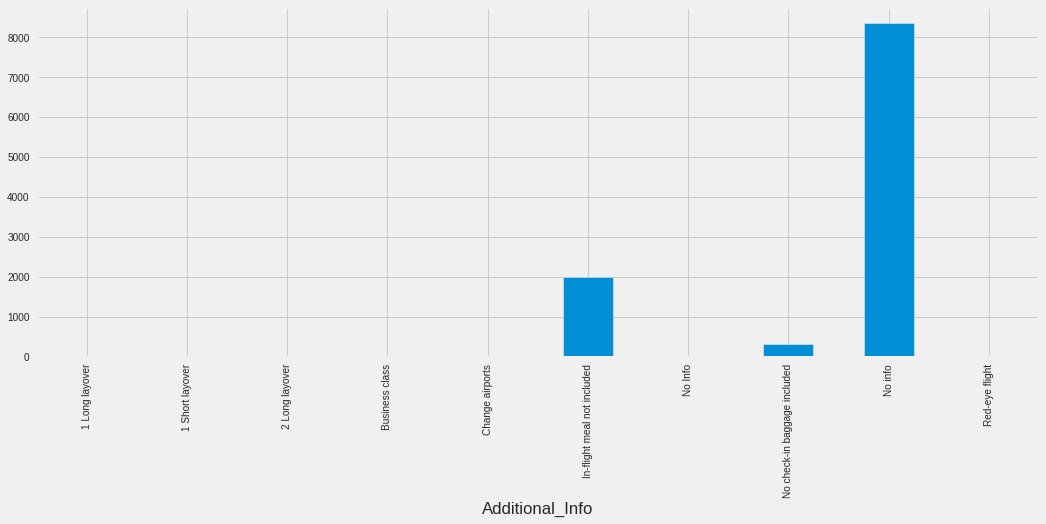

In [22]:
df.groupby(by=["Additional_Info"])["Price"].count().plot(kind='bar',figsize=(16,6))

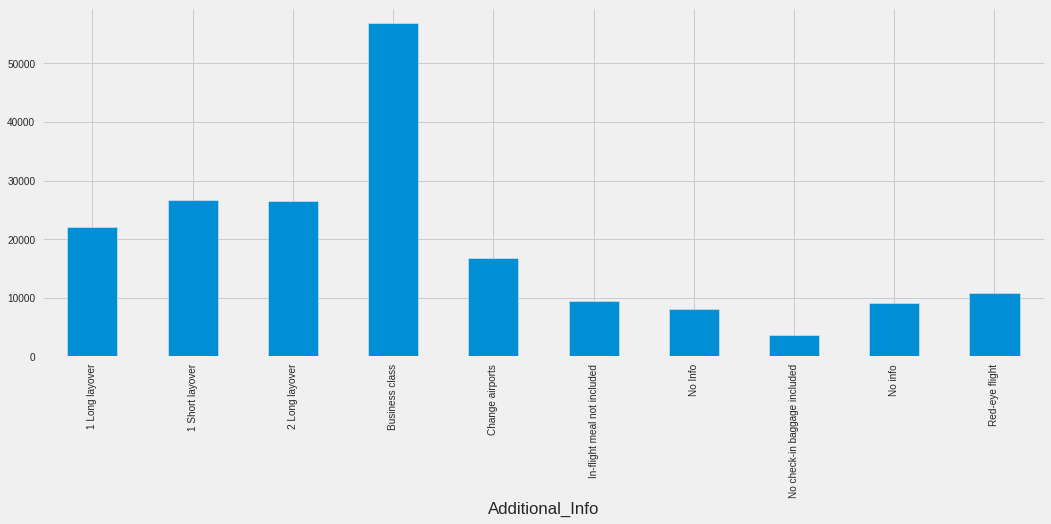

In [23]:
df.groupby(by=["Additional_Info"])["Price"].mean().plot(kind='bar',figsize=(16,6))

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

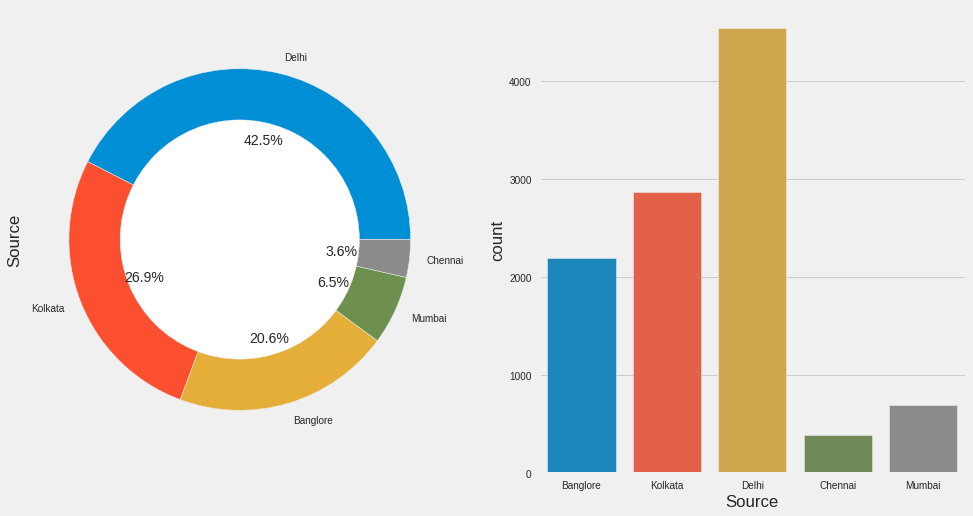

In [24]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Source'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Source',data=df)
df['Source'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

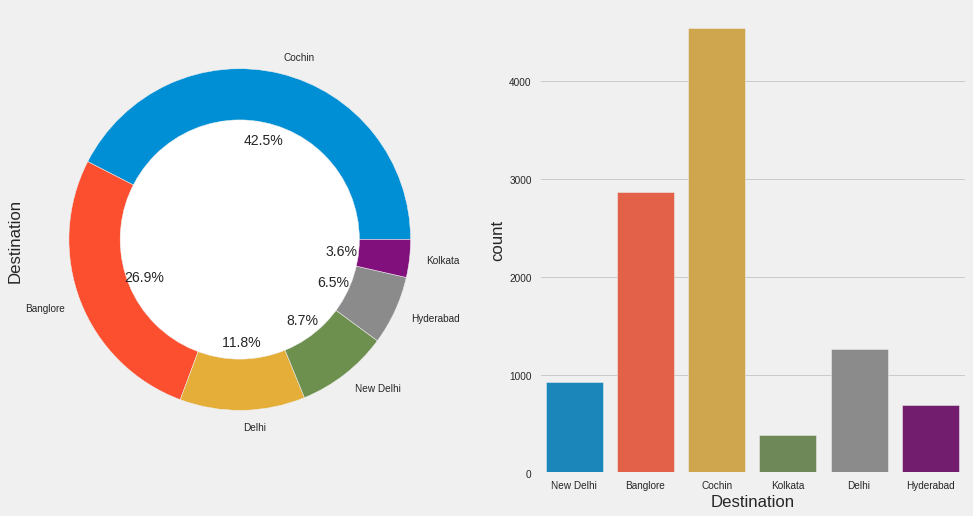

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Destination',data=df)
df['Destination'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

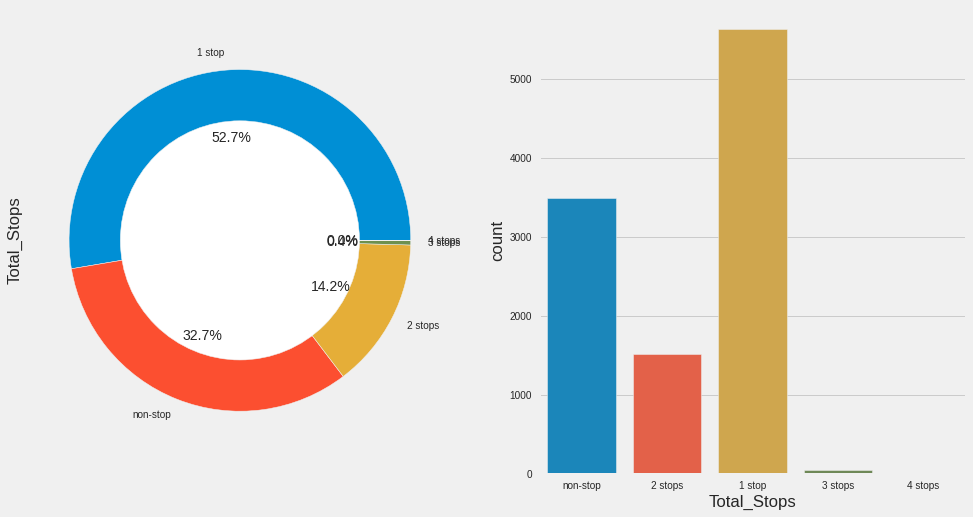

In [26]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Total_Stops',data=df)
df['Total_Stops'].value_counts()

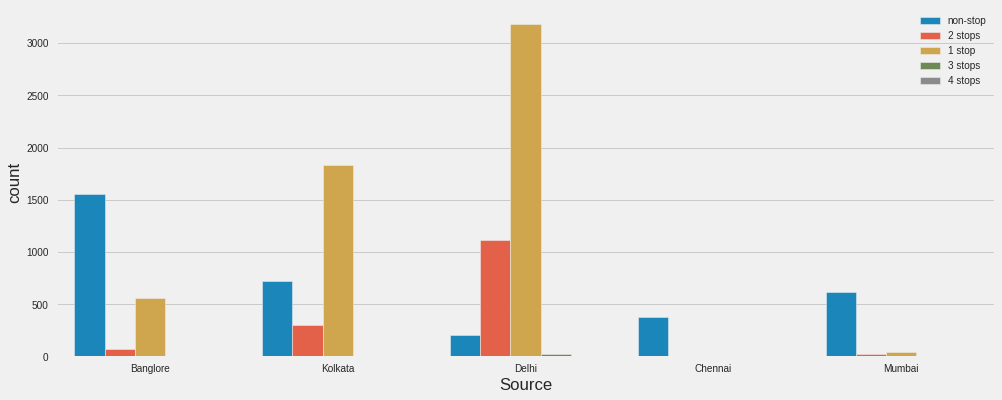

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(df['Source'],hue='Total_Stops',data=df)
plt.legend(loc='upper right')

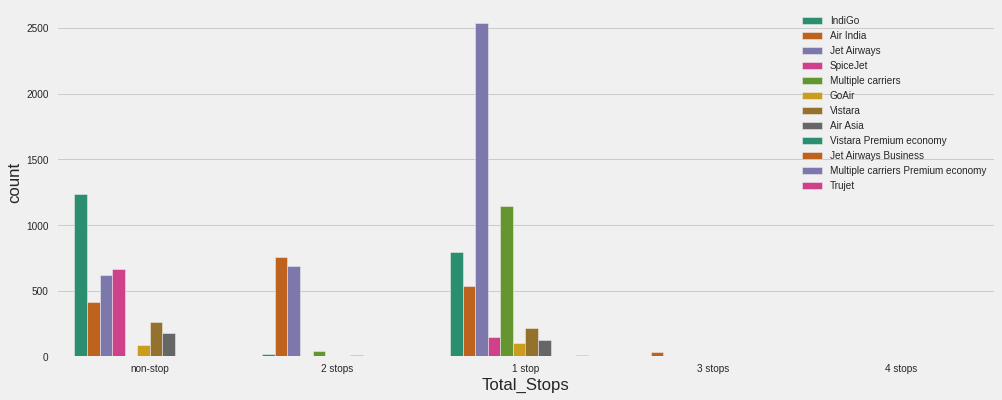

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(df['Total_Stops'],hue='Airline',data=df,palette='Dark2')
plt.legend(loc='upper right')

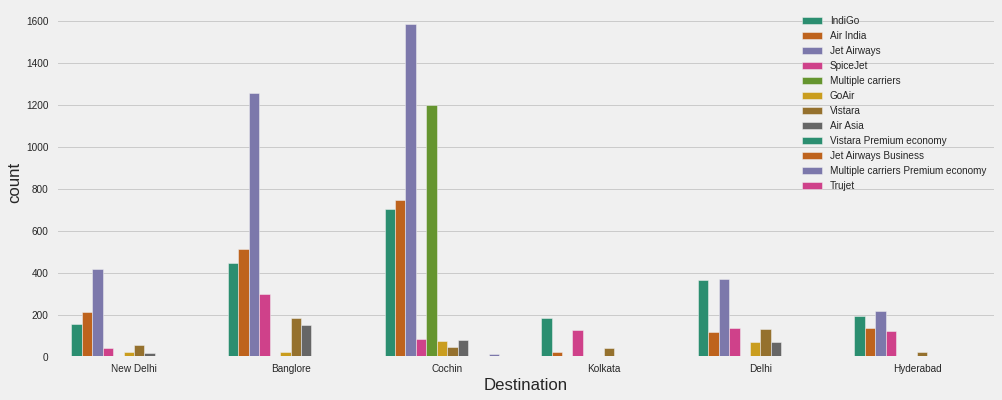

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(df['Destination'],hue='Airline',data=df,palette='Dark2')
plt.legend(loc='upper right')

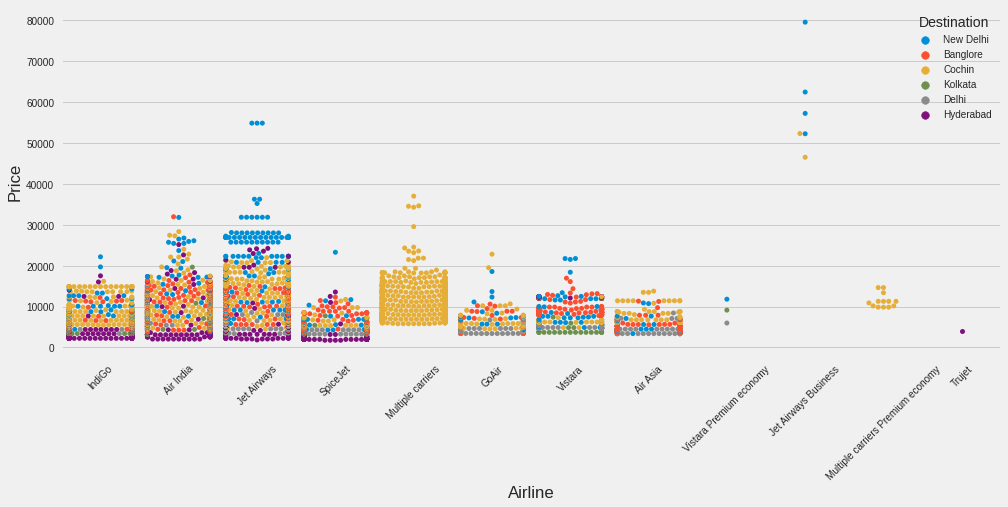

In [30]:
plt.figure(figsize=(15,6))
#sns.boxenplot(x='Airline',y='Price',hue='Destination',data=df)
sns.swarmplot(x='Airline',y='Price',hue='Destination',data=df)
plt.xticks(rotation=45)
plt.show()

In [31]:
# function for month extraction 
def getSeason(month):
    if (month in [12, 1, 2]):
       return "winter"
    elif (month in [3, 4, 5]):
       return "spring"
    elif (month in [6, 7, 8]):
       return "summer"
    else:
       return "fall"

# function for period extraction 
def getPeriodOfDay(x):
    x = int(x[:2])
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

# function for duration counting in min    
def getDuration(x):
    replacements = [
    ('h', ':'),
    ('m', ''),
    (' ', '')]
    for old, new in replacements:
        x = re.sub(old, new, x)
    splt = x.split(':')
    hours_to_min = int(splt[0])*60
    if len(splt) == 2 and splt[1].isdigit():
        fin = hours_to_min + int(splt[1])
    else:
        fin = hours_to_min
    return fin

# function for duration counting     
def getDurationHours(x):
    replacements = [
    ('h', ':'),
    ('m', ''),
    (' ', '')]
    for old, new in replacements:
        x = re.sub(old, new, x)
    splt = x.split(':')
    hours_to_min = int(splt[0])*60
    if len(splt) == 2 and splt[1].isdigit():
        fin = hours_to_min + int(splt[1])
    else:
        fin = hours_to_min
    return splt[0]

In [32]:
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month # month
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day # day
#df['season'] = df['month'].apply(getSeason) # season
#df['Dep_Time_Period'] = df['Dep_Time'].apply(getPeriodOfDay) # period of day (departure time)
#df['Arrival_Time_Period'] = df['Arrival_Time'].apply(getPeriodOfDay) # period of day (arrival time)
df['Duration_Minutes'] = df['Duration'].apply(getDuration) # duration of a flight
#df['Duration_Hours'] = df['Duration'].apply(getDurationHours) # duration of a flight in hours

In [33]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_Minutes
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897,3,24,170
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,445
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13882,9,6,1140
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,325
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,285


In [34]:
df=df.drop(columns=["Date_of_Journey","Route"],axis=1)

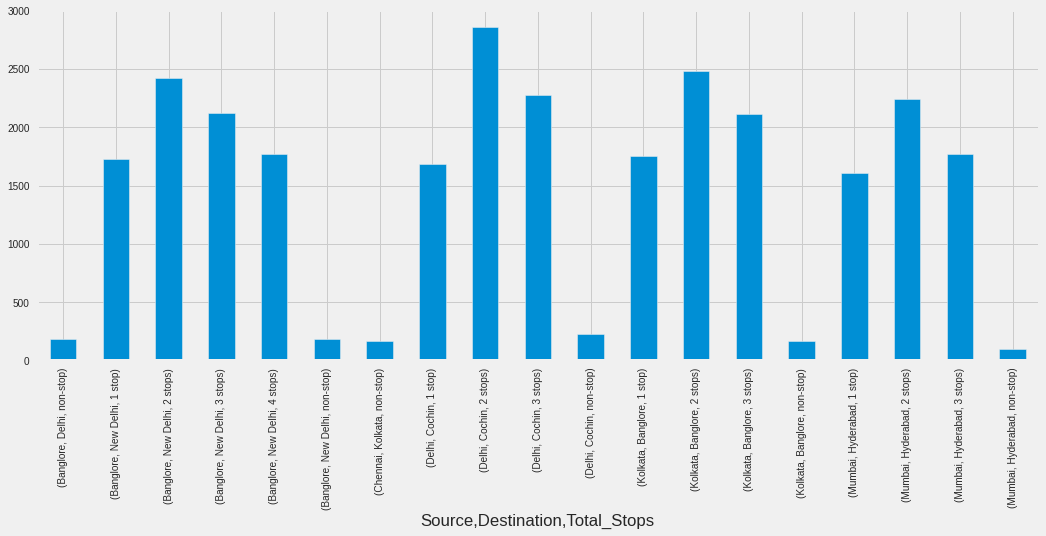

In [35]:
df.groupby(by=["Source","Destination","Total_Stops"])["Duration_Minutes"].max().plot(kind='bar',figsize=(16,6))

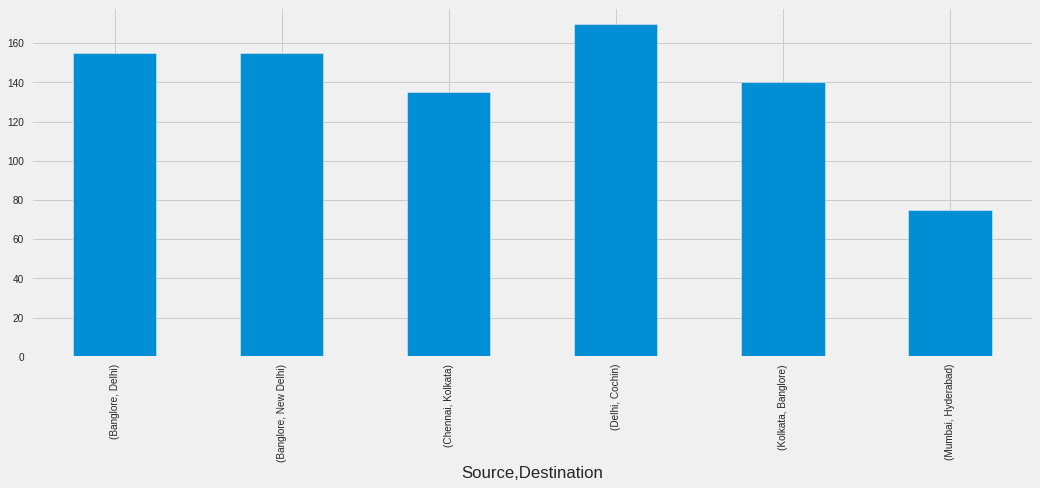

In [36]:
df.groupby(by=["Source","Destination"])["Duration_Minutes"].min().plot(kind='bar',figsize=(16,6))

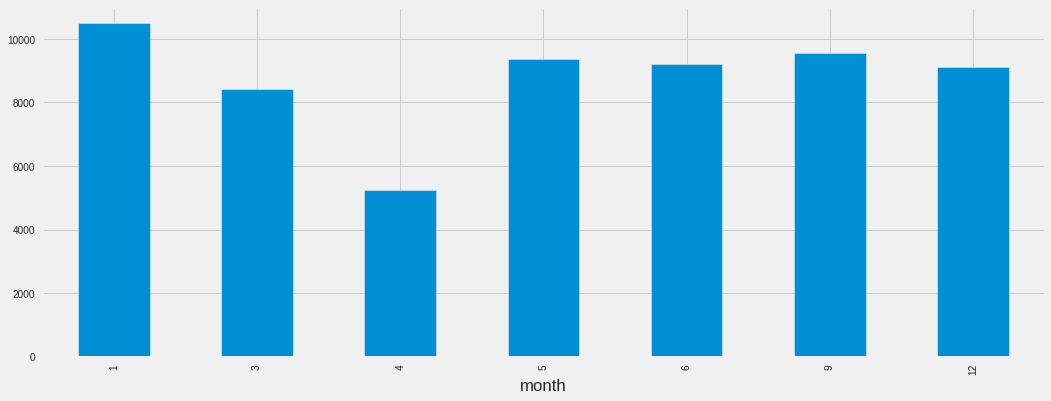

In [37]:
df.groupby(by=["month"])["Price"].mean().plot(kind='bar',figsize=(16,6))

In [38]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_Minutes
0,IndiGo,Banglore,New Delhi,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897,3,24,170
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,445
2,Jet Airways,Delhi,Cochin,09:25,10-06-2022 04:25,19h,2 stops,No info,13882,9,6,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,325
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,285


In [39]:
le_encoder=LabelEncoder()

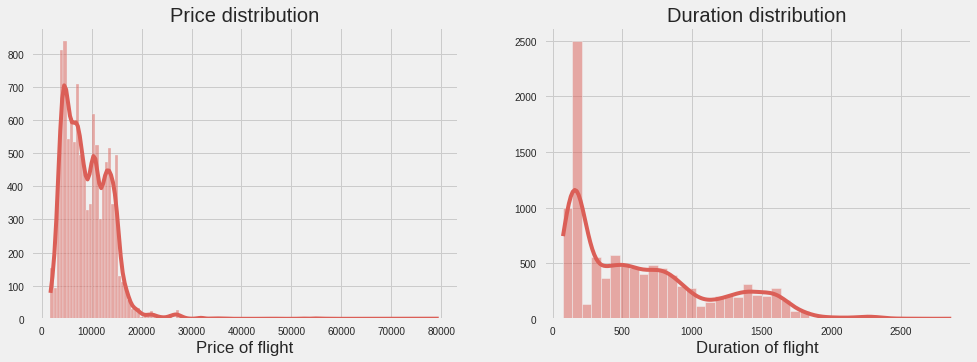

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df["Price"], ax=axes[0], kde=True)
axes[0].set_title("Price distribution")
axes[0].set_xlabel("Price of flight")
axes[0].set_ylabel(None)

sns.histplot(df["Duration_Minutes"], ax=axes[1], kde=True)
axes[1].set_title("Duration distribution")
axes[1].set_xlabel("Duration of flight")
axes[1].set_ylabel(None)

plt.show()

In [41]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

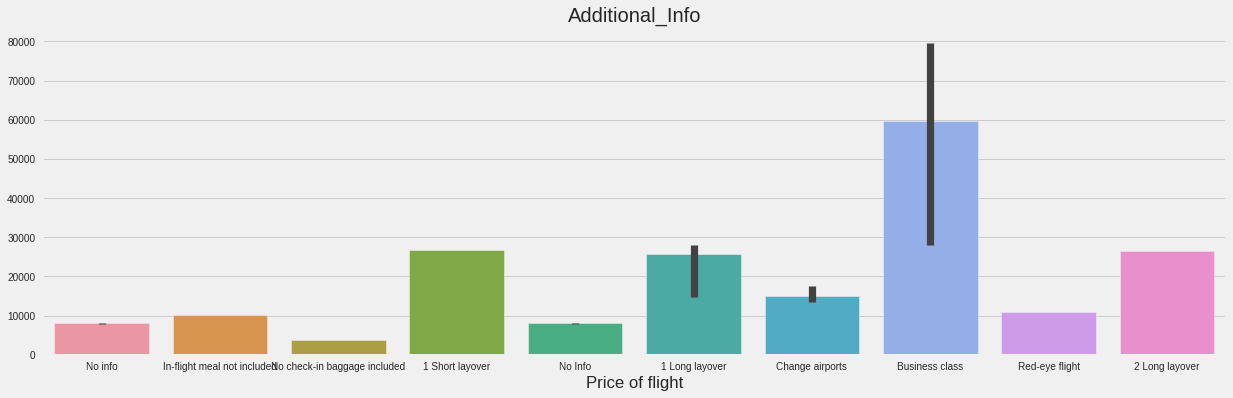

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(18,6))
fig.tight_layout(pad=3.0)

sns.barplot(data=df, x=df["Additional_Info"], y=df["Price"], ax=axes, estimator=np.median)
axes.set_title("Additional_Info")
axes.set_xlabel("Price of flight")
axes.set_ylabel(None)
plt.show()

### We perform winsorization on Price: all lowest and highest values are set to 1% and 99% percentile respectively. It's better here than just dropping price outliers: just keep them big/small enough.

### And in order to make it more normally distributed, we also apply BoxCox transformation.

In [43]:
df["Price_wins"] = winsorize(df["Price"], limits = 0.01) 
#df["Price_log"], param_1 = boxcox(df["Price_wins"]) # param_1 will be used for inverse transformation

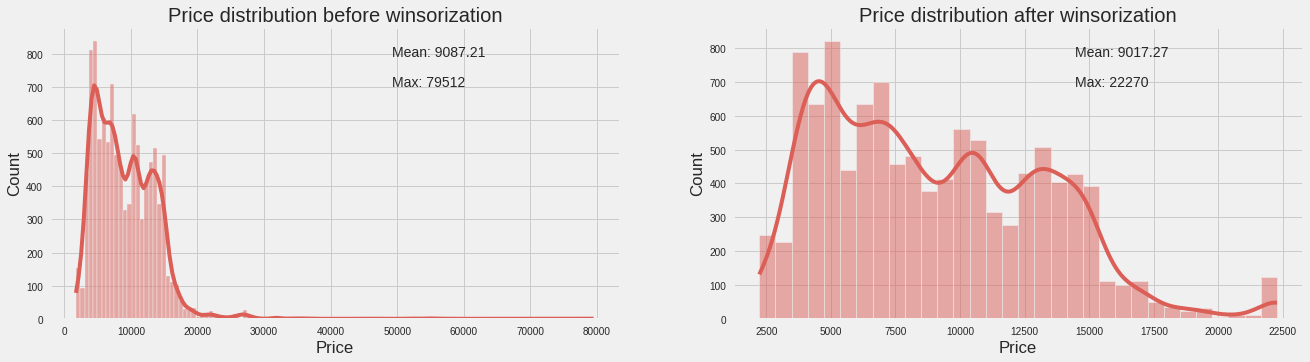

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(ax=axes[0], x=df["Price"], kde=True)
sns.histplot(ax=axes[1], x=df["Price_wins"], kde=True)
#sns.histplot(ax=axes[2], x=df["Price_log"], kde=True)
axes[0].set_title("Price distribution before winsorization")
axes[0].set_xlabel("Price")
axes[0].text(0.6, 0.9, f'Mean: {np.round(df["Price"].mean(), 2)}',  
        fontsize = 14,
        transform = axes[0].transAxes)
axes[0].text(0.6, 0.8, f'Max: {np.round(df["Price"].max(), 2)}',  
        fontsize = 14,
        transform = axes[0].transAxes)
axes[1].set_title("Price distribution after winsorization")
axes[1].set_xlabel("Price")
axes[1].text(0.6, 0.9, f'Mean: {np.round(df["Price_wins"].mean(), 2)}',  
        fontsize = 14,
        transform = axes[1].transAxes)
axes[1].text(0.6, 0.8, f'Max: {np.round(df["Price_wins"].max(), 2)}',  
        fontsize = 14,
        transform = axes[1].transAxes)
# axes[2].set_title("Price distribution after BoxCox transformation")
# axes[2].set_xlabel("Price")
# axes[2].text(0.73, 0.9, f'Mean: {np.round(df["Price_log"].mean(), 2)}',  
#         fontsize = 14,
#         transform = axes[2].transAxes)
# axes[2].text(0.75, 0.8, f'Max: {np.round(df["Price_log"].max(), 2)}',  
#         fontsize = 14,
#         transform = axes[2].transAxes)
plt.show()

In [45]:
df["Duration_Minutes_wins"] = winsorize(df["Duration_Minutes"], limits = 0.01)

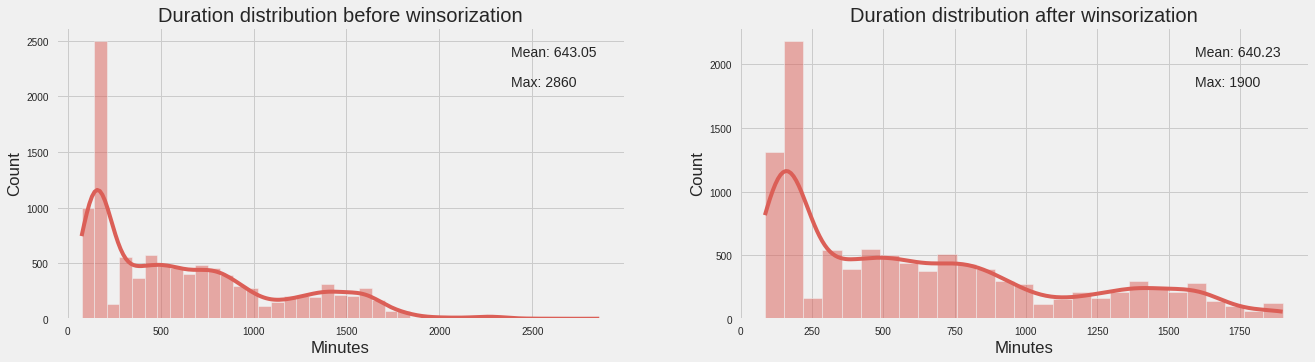

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(ax=axes[0], x=df["Duration_Minutes"], kde=True)
sns.histplot(ax=axes[1], x=df["Duration_Minutes_wins"], kde=True)
axes[0].set_title("Duration distribution before winsorization")
axes[0].set_xlabel("Minutes")
axes[0].text(0.8, 0.9, f'Mean: {np.round(df["Duration_Minutes"].mean(), 2)}',  
        fontsize = 14,
        transform = axes[0].transAxes)
axes[0].text(0.8, 0.8, f'Max: {np.round(df["Duration_Minutes"].max(), 2)}',  
        fontsize = 14,
        transform = axes[0].transAxes)
axes[1].set_title("Duration distribution after winsorization")
axes[1].set_xlabel("Minutes")
axes[1].text(0.8, 0.9, f'Mean: {np.round(df["Duration_Minutes_wins"].mean(), 2)}',  
        fontsize = 14,
        transform = axes[1].transAxes)
axes[1].text(0.8, 0.8, f'Max: {np.round(df["Duration_Minutes_wins"].max(), 2)}',  
        fontsize = 14,
        transform = axes[1].transAxes)
plt.show()

<Figure size 576x396 with 0 Axes>

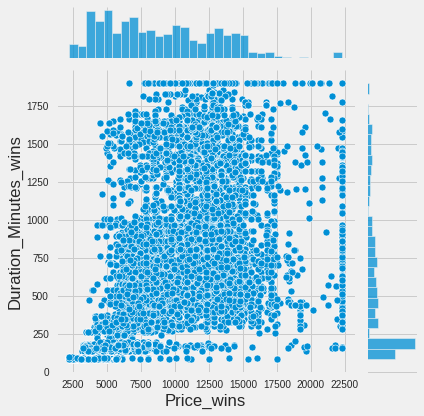

In [47]:
plt.figure()
pl = sns.jointplot(x=df["Price_wins"], y=df["Duration_Minutes_wins"])
plt.show()

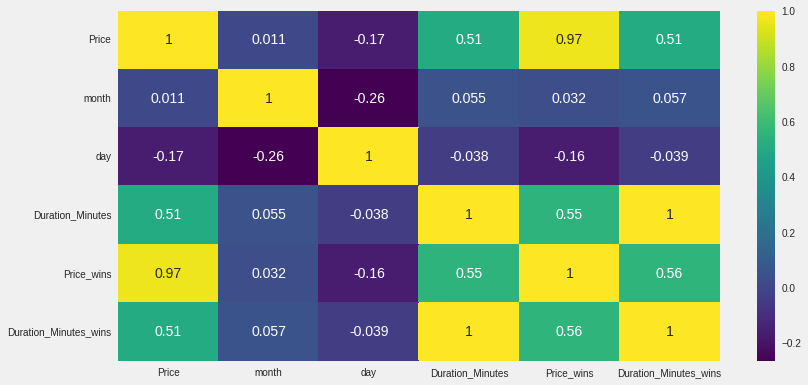

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [49]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_Minutes,Price_wins,Duration_Minutes_wins
0,IndiGo,Banglore,New Delhi,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897,3,24,170,3897,170
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,445,7662,445


In [50]:
df_selected = df.copy()
# include only encoded and other selected features 
df_selected = df_selected.drop(["Duration_Minutes_wins","Duration","Price",
                               ], axis=1)

df_selected.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,month,day,Duration_Minutes,Price_wins
0,IndiGo,Banglore,New Delhi,22:20,22-03-2022 01:10,non-stop,No info,3,24,170,3897
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,1,5,445,7662
2,Jet Airways,Delhi,Cochin,09:25,10-06-2022 04:25,2 stops,No info,9,6,1140,13882
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,12,5,325,6218
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,No info,1,3,285,13302


In [51]:
df_selected["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [52]:
df_selected["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [53]:
df_selected["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [54]:
df_selected["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [55]:
df_selected["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [56]:
df_selected["Source"]=le_encoder.fit_transform(df_selected['Source'])
df_selected["Destination"]=le_encoder.fit_transform(df_selected['Destination'])
df_selected["Airline"]=le_encoder.fit_transform(df_selected['Airline'])
df_selected["Additional_Info"]=le_encoder.fit_transform(df_selected['Additional_Info'])
df_selected["Total_Stops"]=le_encoder.fit_transform(df_selected['Total_Stops'])

df_selected.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,month,day,Duration_Minutes,Price_wins
0,3,0,5,22:20,22-03-2022 01:10,4,8,3,24,170,3897
1,1,3,0,05:50,13:15,1,8,1,5,445,7662
2,4,2,1,09:25,10-06-2022 04:25,1,8,9,6,1140,13882
3,3,3,0,18:05,23:30,0,8,12,5,325,6218
4,3,0,5,16:50,21:35,0,8,1,3,285,13302


In [57]:
df_selected["Airline"].value_counts()

4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [58]:
df_selected["Source"].value_counts()

2    4536
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64

In [59]:
df_selected["Destination"].value_counts()

1    4536
0    2871
2    1265
5     932
3     697
4     381
Name: Destination, dtype: int64

In [60]:
df_selected["Total_Stops"].value_counts()

0    5625
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

In [61]:
df_selected["Additional_Info"].value_counts()

8    8344
5    1982
7     320
0      19
4       7
3       4
6       3
1       1
9       1
2       1
Name: Additional_Info, dtype: int64

In [62]:
df_selected=df_selected.drop(columns=["Dep_Time","Arrival_Time"],axis=1)

In [63]:
df_selected.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,month,day,Duration_Minutes,Price_wins
0,3,0,5,4,8,3,24,170,3897
1,1,3,0,1,8,1,5,445,7662


In [64]:
X = df_selected.drop(columns=["Price_wins"])
y = df_selected['Price_wins']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2022)


In [65]:
X_train

,Airline,Source,Destination,Total_Stops,Additional_Info,month,day,Duration_Minutes
8743,0,0,2,4,8,9,6,170
4440,6,2,1,0,8,5,15,455
8437,1,2,1,4,8,6,15,170
2703,2,0,2,4,8,1,4,175
4184,1,0,5,0,8,9,3,980
...,...,...,...,...,...,...,...,...
6384,3,0,2,4,8,6,24,185
4720,3,2,1,0,8,3,27,515
173,6,2,1,0,8,6,27,570
1244,10,3,0,0,8,6,5,930


In [66]:
y_train

8743     7120
4440     9001
8437     5201
2703     4239
4184     5626
        ...  
6384     4823
4720     7048
173     13587
1244     8452
4989    14151
Name: Price_wins, Length: 7477, dtype: int64

[0.15738212 0.01822032 0.02901809 0.44191075 0.04533562 0.06396291
 0.10208322 0.14208696]


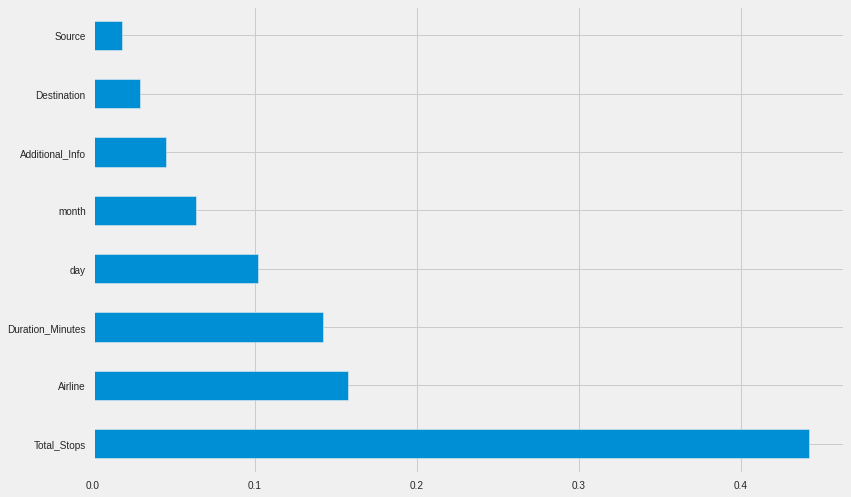

In [67]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators=100,criterion='squared_error',verbose=1,
                              max_depth=6,max_features='auto')
reg_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestRegressor(max_depth=6, verbose=1)

In [69]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.8293724794303777

In [70]:
reg_rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8235203206439923

In [71]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1252.357718469714
MSE: 3241215.626494599
RMSE: 1800.3376423589546


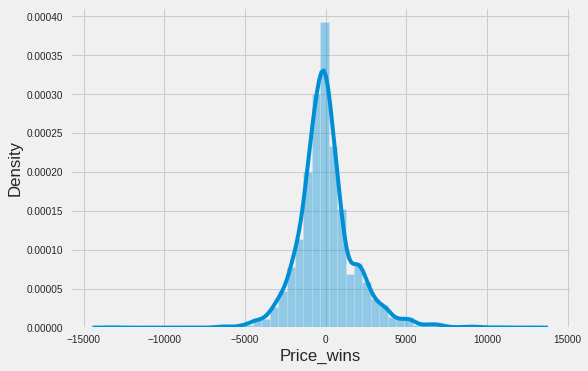

In [72]:
sns.distplot(y_test-y_pred)
plt.show()

In [73]:
param_grid = {'max_depth': [4, 5, 6,7,8], 'n_estimators': [100, 200, 300]
             }

grid = GridSearchCV(reg_rf, param_grid, cv=5).fit(X_train, y_train) 
#'learning_rate': [0.01, 0.05, 0.1, 0.2],

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [74]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 300}

In [75]:
grid.best_score_

0.8478748445197699

### Building the Model with Hyper Parameter values from grid Search CV

In [76]:
reg_rf = RandomForestRegressor(n_estimators=200,criterion='squared_error',verbose=1,
                              max_depth=8,max_features='auto')
reg_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished


RandomForestRegressor(max_depth=8, n_estimators=200, verbose=1)

In [77]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


0.8803750880578746

In [78]:
reg_rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


0.8566360200418925

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1073.5430862824571
MSE: 2633014.5986910085
RMSE: 1622.6566484290533


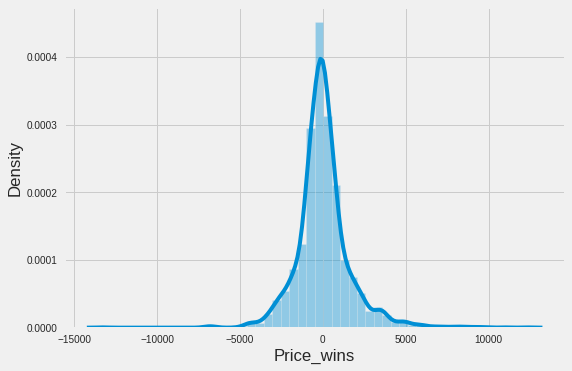

In [80]:
sns.distplot(y_test-y_pred)
plt.show()

### Saving the Model

In [81]:
from pickle import dump,load

In [82]:
pickle.dump(reg_rf,open("/content/drive/MyDrive/Colab Notebooks/Flight_Fare_price_Predictions/Random_forest_intelligence.pkl","wb"))

In [83]:
loaded_model=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Flight_Fare_price_Predictions/Random_forest_intelligence.pkl","rb"))

In [84]:
loaded_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


array([13730.42342121, 10060.32285174, 12856.26843493, ...,
       18994.71743768,  7057.85589879, 14439.84843661])